# Projeto 2 - Ciência dos Dados

______________________________________________________

## Participantes:


Henrique Andrade Albuqurque 


Mateus Marinheiro 


Matheus Constante

________________________________________

## Introdução

### Tema:

   Previsão da nota média do Enem de um aluno baseado nos seguintes features:

   

### Target:
 
 - NU_NOTA_MT:

      Uma empresa junior está procurando por jovens, formados na escola que possuem o raciocínio logíco desenvolvido, além de possuirem um bom compreendimento das matérias de exatas. Desse modo, a firma possui a intenção de projetar um classificdor que preve a nota do enem de matemática de alunos, baseados em algumas características importantes para a firma. 
      
      A firma deseja contratar um novo grupo de trainees que poussuam diferentes experiencias e culturas, para assim obter no conjunto uma grande de variação de aprendizados gerais. Devido a isso, o classificador deve prever as notas de matemáticas de pessoas baseadas nas seguinte features: que sejam treineiros ou não, para ficar de olho em futuros membros; na faixa etária, pois a empresa está visando contratar jovens entre 18 e 25 anos para possuir diferentes visões de mundo, entretando não é uma obrigação ser menor que 25 anos; no sexo da pessoas para possuir um grupo misto que também possua a visão entre diferentes gêneros, e que incentive as mulheres a virem para a área de exatas; na raça, para haver uma diferença de culturas dentro do grupo, e visões sobre o preconceito no mundo atual; e por último no tipo de escola que a pessoas frenquentou, pois existe uma grande variação das experinêcias obtidas pelos alunos de escolas públicas e privadas.


### Features: 

 - TP_FAIXA_ETARIA:
   - Faixa Etária dos participantes
      - 1- Menor de 17 anos
      - 2- 17 anos
      - 3- 18 anos
      - 4- 19 anos
      - 5- 20 anos
      - 6- 21 anos
      - 7- 22 anos
      - 8- 23 anos
      - 9- 24 anos
      - 10- 25 anos
      - 11- Entre 26 e 30 anos
      - 12- Entre 31 e 35 anos
      - 13- Entre 36 e 40 anos
      - 14- Entre 41 e 45 anos
      - 15- Entre 46 e 50 anos
      - 16- Entre 51 e 55 anos
      - 17- Entre 56 e 60 anos
      - 18- Entre 61 e 65 anos
      - 19- Entre 66 e 70 anos
      - 20- Maior de 70 anos

 - TP_SEXO: 
    - Sexo do Participante
      - M - Masculino
      - F - Feminino
 - TP_COR_RAÇA:
    - Cor/Raça do participante
      - 0- Não declarado
      - 1- Branca
      - 2- Preta
      - 3- Parda
      - 4- Amarela
      - 5- Indígina
      - 6- Não dispõe da informação
 - IN_TREINEIRO:
    - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
      - 0 - Sim
      - 1 - Não
 - TP_ESCOLA:
    - Tipo de escola do Ensino Médio:
       - 1- Não respondeu
       - 2- Pública
       - 3- Privada

________

Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\rique\OneDrive\Área de Trabalho\INSPER\2023\2 semestre\C dados\Projeto-2-Ciencia-dos-Dados


Carregando a base de dados:

In [3]:
dados = pd.read_excel('DADOS\MICRODADOS_ENEM_2022.xlsx') # Lê o arquivo excel
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,14,M,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,14,M,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,5,F,2,1,0,NaN,421.1,546.0,498.8,565.3,760.0
3,6,M,3,1,0,NaN,490.7,388.6,357.8,416.0,320.0
4,4,M,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN


Separando colunas de Target e Features:

In [4]:
dados = dados.loc[:, ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "TP_ESCOLA", "IN_TREINEIRO", "NU_NOTA_MT"]] # Seleciona as colunas que serão utilizadas como features
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
0,14,M,2,1,0,NaN
1,14,M,1,1,0,NaN
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
4,4,M,3,1,0,NaN


#### Retirando Linhas vazias da coluna Target

In [5]:
# Remover as linhas com NaN apenas na coluna 'NU_NOTA_MT'
dados = dados.dropna(subset=['NU_NOTA_MT'])
dados.head(5)


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
7,6,F,2,1,0,404.9
9,4,F,3,1,0,435.3
11,2,F,1,3,0,456.8


### Classificando Variáveis genéricas

In [6]:
# Mudando o nome das variáveis da coluna TP_FAIXA_ETARIA

novas_categorias = {1 : '< 17', 2 : '17', 2 : '18', 3 : '19', 4 : '20', 5 : '21', 6 : '22', 7 : '23', 8 : '24', 9 : '25', 10 : '26-30', 11 : '31-35', 12 : '36-40', 13 : '41-45', 14 : '46-50', 15 : '51-55', 16 : '56-60', 17 : '61-65', 18 : '66-70', 19 : '71-75', 20 : '70 >'}
dados['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_COR_RACA]

novas_categorias = {0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 4 : 'Amarela', 5 : 'Indígena', 6 : 'Não dispõe da informação'}
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_ESCOLA

novas_categorias = {1 : 'Não respondeu', 2 : 'Pública', 3 : 'Privada'}
dados['TP_ESCOLA'] = dados['TP_ESCOLA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna IN_TREINEIRO

novas_categorias = {0 : 'Sim', 1 : 'Não'}
dados['IN_TREINEIRO'] = dados['IN_TREINEIRO'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_SEXO

novas_categorias = {'M' : 'Masculino', 'F' : 'Feminino'}
dados['TP_SEXO'] = dados['TP_SEXO'].astype('category').cat.rename_categories(novas_categorias)



#### Análise descritiva detalhada das variáveis


- Faixa Etária x Notas de Matemática

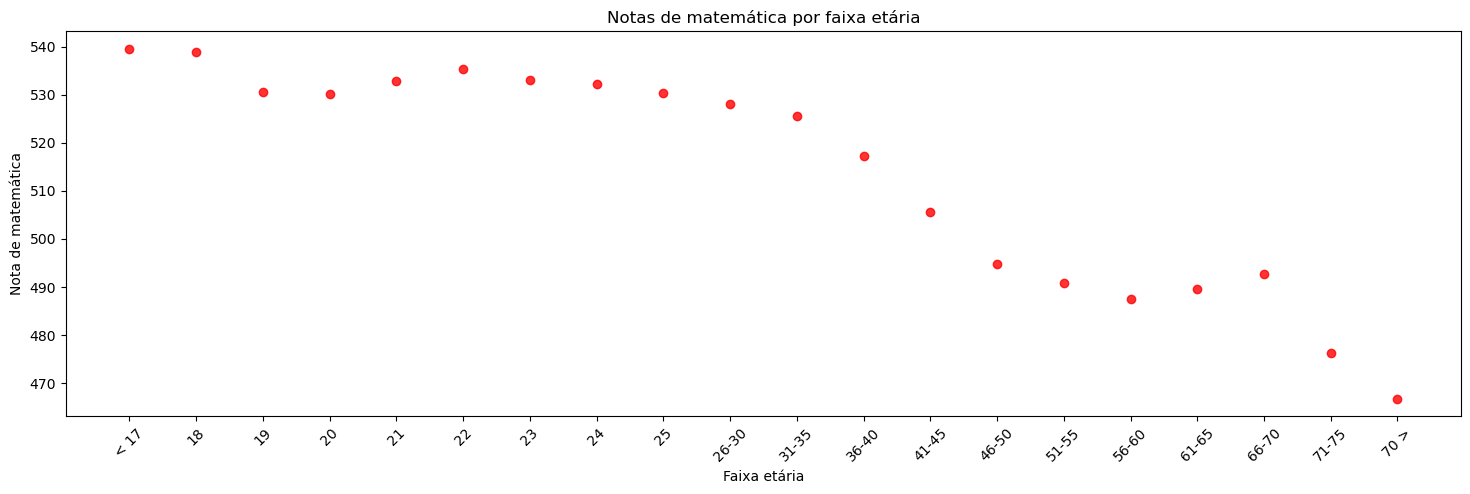

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o DataFrame que contém suas notas e faixas etárias

# Médias das notas de matemática por faixa etária
y = dados.groupby(['TP_FAIXA_ETARIA']).NU_NOTA_MT.mean()

# Criando um array com os índices para o eixo x
x = np.arange(len(y))

# Gráfico de dispersão das notas de matemática por faixa etária
fig = plt.figure(figsize=(18, 5))
plt.scatter(x, y, c='red', alpha=0.8)

# Configurando os ticks do eixo x
plt.xticks(x, labels=y.index, rotation=45)

plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()


- Gráfico da média de notas por faixa etária

O gráfico acima ilustra a média das notas em relação às diferentes faixas etárias. Optamos por esse formato de gráfico com médias, uma vez que a inclusão de todas as notas tornaria a representação demasiadamente poluída. Quanto ao uso de um histograma, devido à quantidade significativa de dados (20 conjuntos), poderia gerar certa confusão na interpretação.

É possível observar uma influência da faixa etária nas notas de Matemática. Essa influência não é integral, porém evidencia-se que, em média, as notas tendem a diminuir conforme a faixa etária aumenta.

- Analise para o tema

Como pode ser visto no gráfico, para a firma é realmente mais interessante contratar jovens abaixo de 25 anos, o que justifica esse objetivo deles, porém os que possuem melhor aproveitamento no enem são jovens abaixo de 17 ou de 18 ou 20 anos. Desse modo, a firma deve focar em contratar jovens que possuam essas idades, ou se optarem por buscar pessoas mais velhas, devem abrir mão do objetivo de buscar notas melhores.

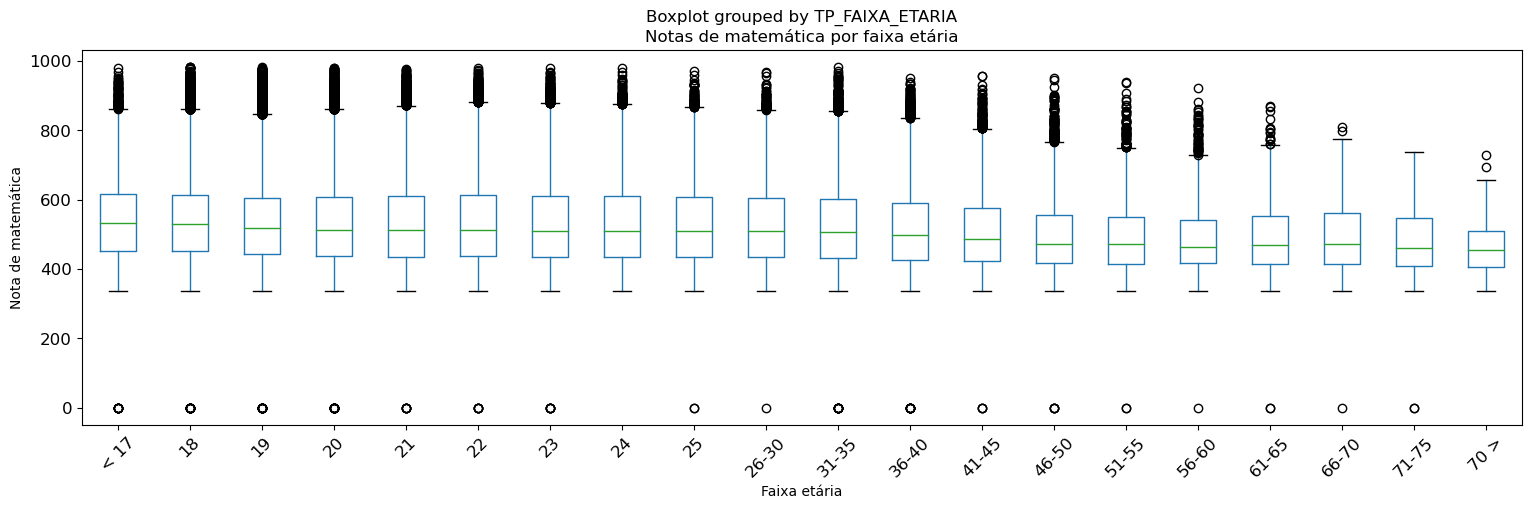

In [8]:
dados.boxplot(column='NU_NOTA_MT', by='TP_FAIXA_ETARIA', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico boxplot notas de matemática por faixa etária

O gráfico acima, utilizando o boxplot, ilustra alguns dados das notas dos alunos conforme a faixa etária. Da mesma forma que no gráfico acima, é possível observar que, de maneira geral, o desempenho médio dos alunos vai decaindo à medida que a idade aumenta. Além disso, é possível observar que os quartis do boxplot diminuem de tamanho à medida que a idade aumenta, mostrando que as notas têm menos variação em idades mais altas."

- Analise para o tema:

Ao visualizar o boxplot para a faixa etária, percebemos que existe varios outliers em todas idades, então apesar da média decair ao longo do tempo, é possível encontrar potenciais tabalhadores de todas as idades.

- Sexo x Nota de Matemática

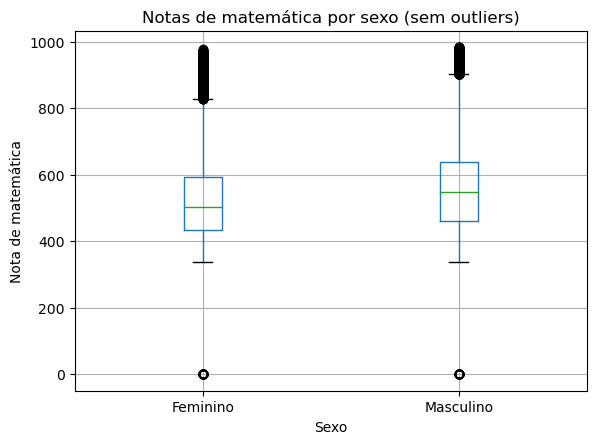

In [9]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_SEXO')
plt.title('Notas de matemática por sexo (sem outliers)')
plt.suptitle('')
plt.xlabel('Sexo')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico notas de matemática por sexo

Ao analisar esse gráfico boxplot, podemos observar que, no contexto das notas de Matemática, o grupo dos homens por ter a caixa mais alta e a mediana mais elevada, tende a ter um desempenho médio superior nessa disciplina em comparação com as mulheres.

- Analise para o tema:

Nota-se uma grande diferença entre a nota dos sexos, sendo que os outliers do sexo masculino estão acima de 900 de nota em matemática, já para o feminino estão acima de 800, o que pode indicar uma necessidade de fazer capacitações ou cursos para depois que contraterem sexos mistos, para certificar que todos terão capacidade de cumprir suas funções de moo eficaz.

- Cor/Raça x Notas de Matemática

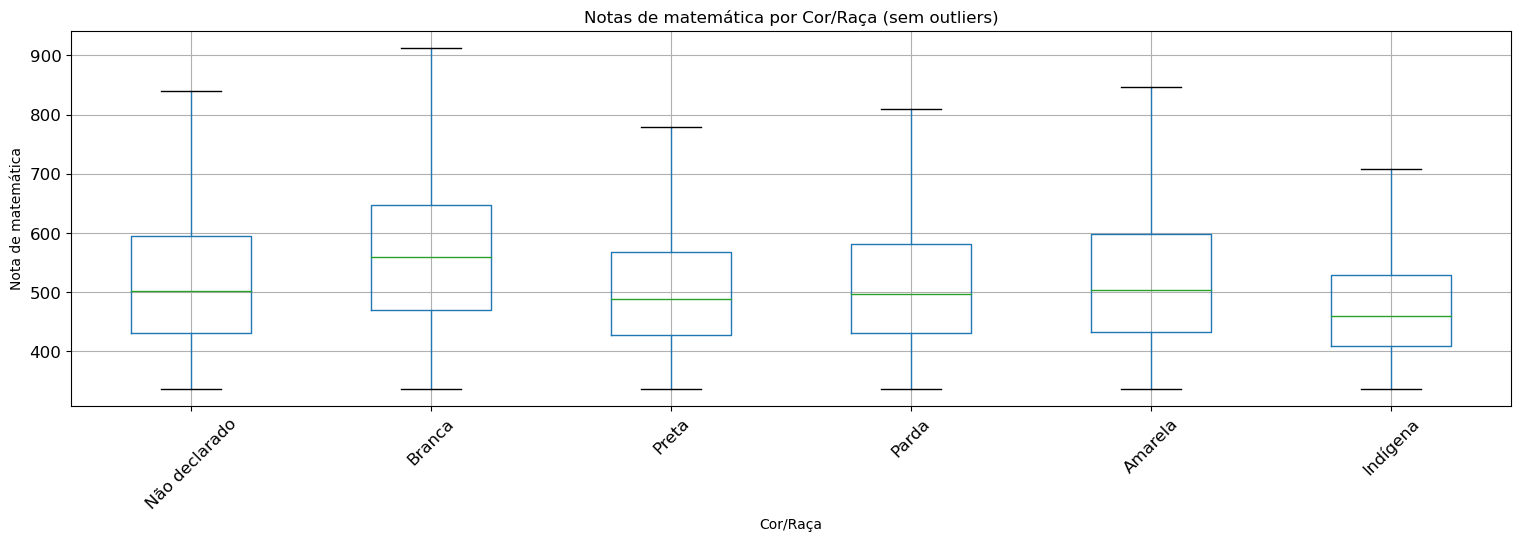

In [10]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', sym='', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por Cor/Raça (sem outliers)')
plt.suptitle('')
plt.xlabel('Cor/Raça')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()



 - Tipo de Escola x Nota de Matemática

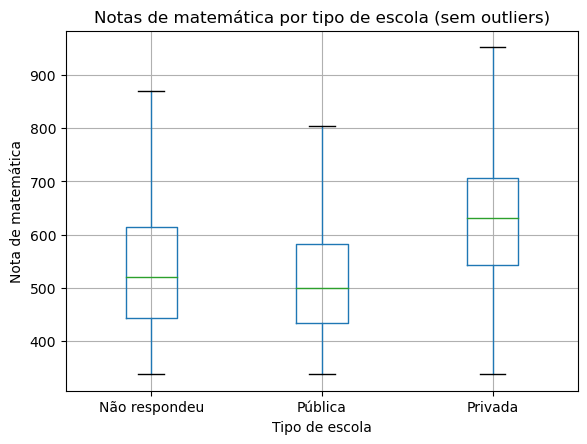

In [11]:
# box plot das notas de matemática por tipo de escola
dados.boxplot(column='NU_NOTA_MT', by='TP_ESCOLA', sym='')
plt.title('Notas de matemática por tipo de escola (sem outliers)')
plt.suptitle('')
plt.xlabel('Tipo de escola')
plt.ylabel('Nota de matemática')
plt.show()


- Analise para o tema:

Vemos que existe uma grande diferença entre alunos de esocla pública e privada, desse modo visando conseguir contratar alunos de ambas localidades, é preciso possuir mais paciencia, e planejar um metodo de ensinar os membros que vierem das escolas públicas para evitar que eles fiquem atrasadas em relação ao resto do grupo.

 - Treineiro/Não treineiro x Nota de Matemática

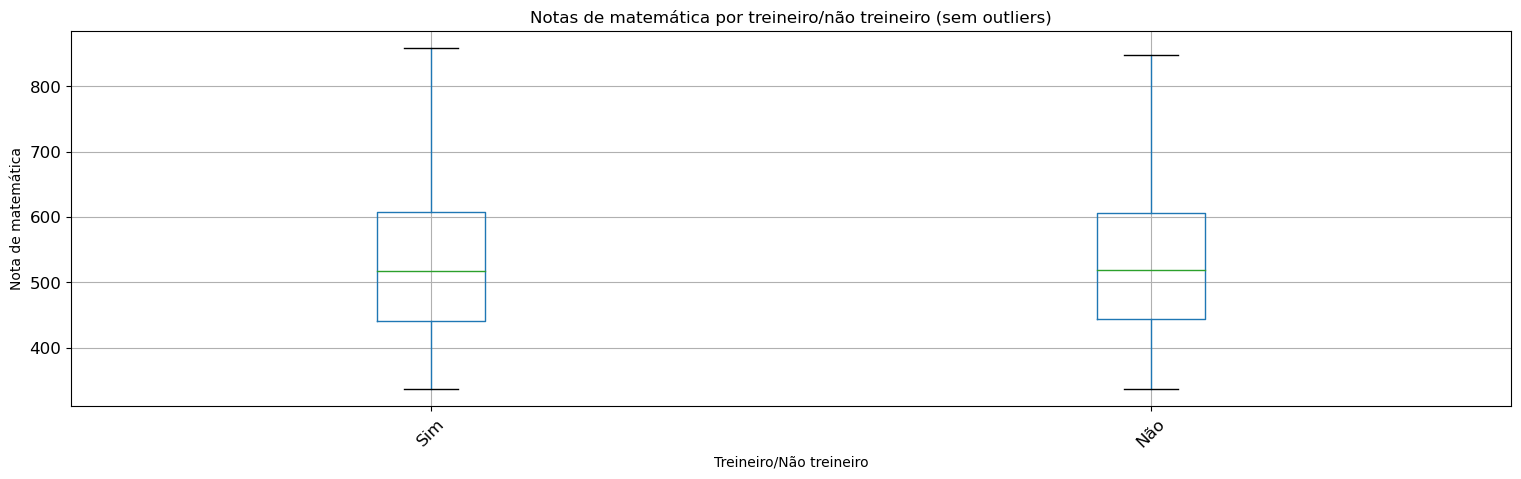

In [12]:
# box plot das notas de matemática por treineiro/nao treineiro

dados.boxplot(column='NU_NOTA_MT', by='IN_TREINEIRO', sym='', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por treineiro/não treineiro (sem outliers)')
plt.suptitle('')
plt.xlabel('Treineiro/Não treineiro')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()


- Analise para o tema:

É visível que a diferença entre treineiros ou não é baixa, desse modo o nível dos membros atuais e futuros se manterá constante, o que indica que a firma não precisa se preocupar muito com o futuro.

## Referências:

 - https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados